In [1]:
import torch
from torch import nn
from torch.optim import Adam
device = torch.device('cuda')

from sklearn.metrics import r2_score, mean_absolute_error

from models import Model6_2
from tools import validation, GridSearch

from get_loaders import get_loaders

In [2]:
train_loader, test_loader = get_loaders(window_size=60, test_size=0.2, batch_size=32)

criterion = nn.MSELoss()
eval_metrics = [r2_score, mean_absolute_error]
lr = 1e-3

100%|██████████| 306/306 [00:00<00:00, 102283.79it/s]


In [3]:
model_name = 'model6_2_nan'

basic_params = {
    'T': 60,
    'n': 7
}

param_grid = {
    'm': [32, 40, 48],
    'T_modified': [20, 30, 40],
}


model_trainer = GridSearch(criterion, eval_metrics, device,
                           temp_save_path=f'checkpoints/{model_name}_temp.pt')
model2_best = model_trainer.train_by_grid(Model6_2, basic_params, param_grid, Adam, train_loader,
                                          test_loader, lr, patience=5, epochs=50, save_filename=f'checkpoints/{model_name}_best.pt')


Total   9 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 43: 100%|██████████| 44/44 [00:02<00:00, 16.13it/s, Train Loss=1042.9495, Valid Loss=3294.9653, Valid R2=0.3223, Valid MAE=42.1756]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 46: 100%|██████████| 44/44 [00:02<00:00, 15.86it/s, Train Loss=5766.3644, Valid Loss=4892.8057, Valid R2=-0.0063, Valid MAE=52.6600]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 36: 100%|██████████| 44/44 [00:02<00:00, 15.85it/s, Train Loss=2372.9285, Valid Loss=4022.3489, Valid R2=0.1727, Valid MAE=49.8587]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 35: 100%|██████████| 44/44 [00:02<00:00, 16.00it/s, Train Loss=1507.5494, Valid Loss=2866.3000, Valid R2=0.4105, Valid MAE=40.2673]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 49: 100%|██████████| 44/44 [00:02<00:00, 16.00it/s, Train Loss=1580.7679, Valid Loss=2308.5032, Valid R2=0.5252, Valid MAE=37.3709]


Setting   5 of Parameters Grid is now on progres.


Epoch 32: 100%|██████████| 44/44 [00:02<00:00, 16.27it/s, Train Loss=1494.4308, Valid Loss=2729.8801, Valid R2=0.4385, Valid MAE=38.3470]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 44/44 [00:02<00:00, 16.27it/s, Train Loss=4951.4003, Valid Loss=4896.8843, Valid R2=-0.0072, Valid MAE=53.8743]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch 41: 100%|██████████| 44/44 [00:02<00:00, 16.02it/s, Train Loss=5780.9847, Valid Loss=4900.2339, Valid R2=-0.0079, Valid MAE=52.8476]


Early Stopped
Setting   8 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 44/44 [00:02<00:00, 16.27it/s, Train Loss=3806.6388, Valid Loss=4839.7935, Valid R2=0.0046, Valid MAE=52.0003]

Early Stopped
Best Parameter Setting is:
{'m': 40, 'T_modified': 30}


Test Loss: 2160.6394 | Test R2: 0.5556 | Test MAE: 35.3124
Saving Process Complete. Directory: model6_2_nan_losses.png


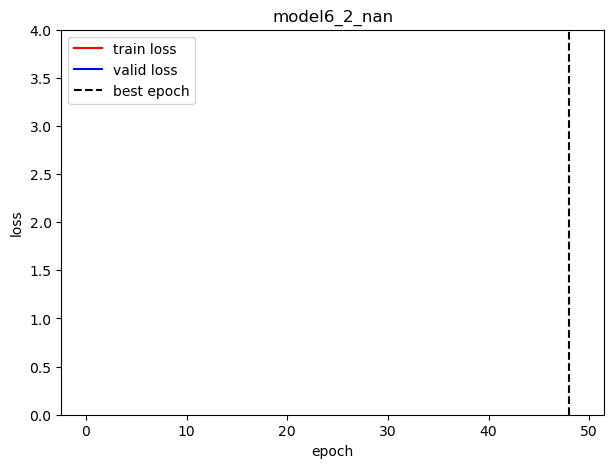

In [4]:
model_trainer.test(test_loader)
model_trainer.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')